# NER dataset

## 1. Loading the data

In [1]:
from google.colab import drive
drive.mount('/gdrive')

%cd /gdrive/MyDrive/cp-EDA-Anomaly

Mounted at /gdrive
/gdrive/MyDrive/cp-EDA-Anomaly


In [ ]:
import pandas as pd
data = pd.read_json('ner_curation_data.json')
data.head()

,document_id,sentence_id,sentence_text,sentence_tokens,entities,NER_BIO_FORMAT,CIRCULAR_TECH_BIO_FORMAT,PARTNERSHIP_RELATIONS
0,000001_7b55fec8b870dba5e0bb21db05bfc5a19fc80cd...,1,Merkinch Local Nature Reserve improvements up ...,"{'1': 'Merkinch', '2': 'Local', '3': 'Nature',...",[],"[[1, O], [2, O], [3, O], [4, O], [5, O], [6, O...","[[1, O], [2, O], [3, O], [4, O], [5, O], [6, O...",[]
1,000001_7b55fec8b870dba5e0bb21db05bfc5a19fc80cd...,2,"Highland Council , in partnership with Sustran...","{'1': 'Highland', '2': 'Council', '3': ',', '4...","[{'name': 'Highland Council', 'tokens': [1, 2]...","[[1, B-GOVERNMENT], [2, I-GOVERNMENT], [3, O],...","[[1, O], [2, O], [3, O], [4, O], [5, O], [6, O...","[{'label': 'LAUNCHED\_BY', 'subject': {'tokens..."
2,000002_9723ca7651d530cba6fb81fdfccbe837622b23c...,1,MOSS Grows Sustainable Product Portfolio with ...,"{'1': 'MOSS', '2': 'Grows', '3': 'Sustainable'...","[{'name': 'MOSS', 'tokens': [1], 'named_entity...","[[1, B-COMPANY], [2, O], [3, O], [4, O], [5, O...","[[1, O], [2, O], [3, O], [4, O], [5, O], [6, O...",[]
3,000002_9723ca7651d530cba6fb81fdfccbe837622b23c...,2,", Aug. 4 , 2021 /PRNewswire/ -- Moss continues...","{'1': ',', '2': 'Aug.', '3': '4', '4': ',', '5...","[{'name': 'Moss', 'tokens': [8], 'named_entity...","[[1, O], [2, O], [3, O], [4, O], [5, O], [6, O...","[[1, O], [2, O], [3, O], [4, O], [5, O], [6, O...","[{'label': 'INVOLVED\_IN', 'subject': {'tokens..."
4,000002_9723ca7651d530cba6fb81fdfccbe837622b23c...,3,Experience the interactive Multichannel News R...,"{'1': 'Experience', '2': 'the', '3': 'interact...",[],"[[1, O], [2, O], [3, O], [4, O], [5, O], [6, O...","[[1, O], [2, O], [3, O], [4, O], [5, O], [6, O...",[]


## 2. Exploratory data analysis

### 2.1 Entities

#### 2.1.1 Write into csv files

In [ ]:
data['entities'].fillna('', inplace=True)
name = []
named_entity = []
circular_tech = []
document_id = []
sentence_id = []
for i, sentence in enumerate(data['entities']):
    for _, entity in enumerate(sentence):
        document_id.append(int(data['document_id'][i][:6]))
        sentence_id.append(int(data['sentence_id'][i]))
        name.append(entity['name'])
        named_entity.append(entity['named_entity'])
        circular_tech.append(entity['circular_tech'])

In [ ]:
conv = lambda i : i or 'NULL'
circular_tech = [conv(i) for i in circular_tech]

In [ ]:
import numpy as np
name = np.asarray(name)
named_entity = np.asarray(named_entity)
circular_tech = np.asarray(circular_tech)
document_id = np.asarray(document_id)
sentence_id = np.asarray(sentence_id)

In [ ]:
entity = pd.DataFrame(data={'document_id':document_id, 'sentence_id':sentence_id, 'circular_tech': circular_tech, 'named_entity':named_entity, 'name':name})
entity.head()
#entity.to_csv('entity.csv')

,document_id,sentence_id,circular_tech,named_entity,name
0,1,2,NULL,GOVERNMENT,Highland Council
1,1,2,NULL,NGO,Sustrans
2,1,2,NULL,FAC,Merkinch Local Nature Reserve ( MLNR ) Boardwalk
3,2,1,NULL,COMPANY,MOSS
4,2,2,NULL,COMPANY,Moss


In [ ]:
nameentity_name = pd.crosstab(name, named_entity, rownames=['name'], colnames=['named_entity'])
nameentity_name['std'] = nameentity_name.std(axis=1)/nameentity_name.sum(axis=1)
nameentity_name.head()
#nameentity_name.to_csv('nameentity_name.csv')

named_entity,ACADEMIA,ASSOCIATION,CHEMICAL,COMPANY,FAC,GOVERNMENT,NGO,PACT,PRODUCT,std
name,,,,,,,,,,
16â³ MacBook,0,0,0,0,0,0,0,0,1,0.333333
Akro - Plastic GmbH.,0,0,0,1,0,0,0,0,0,0.333333
Alliance to End Plastic Waste,0,1,0,0,0,0,0,0,0,0.333333
Alliance to end plastic waste,0,0,0,0,0,0,1,0,0,0.333333
Alterra Energy,0,0,0,1,0,0,0,0,0,0.333333


In [ ]:
data = entity[entity['circular_tech'] != 'NULL']
cir_name = pd.crosstab(data['name'], data['circular_tech'], rownames = ['name'], colnames = ['circular_tech'])
cir_name['std'] = cir_name.std(axis=1)/cir_name.sum(axis=1)
cir_name.head()
#cir_name.to_csv('cir_name.csv')

circular_tech,BIOLOGICAL\_RECYCLING,BIO\_BASED,CHEMICAL\_RECYCLING,IMPROVING\_RECYCLABILITY,MECHANICAL\_RECYCLING,MONOMER\_RECYCLING,PYROLYSIS\_AND\_GASIFICATION,REUSE,std
name,,,,,,,,,
Chevron Phillips Chemical,0,0,0,0,0,0,1,0,0.353553
ADS,0,0,0,0,2,0,0,0,0.353553
AG Resinas,0,0,0,0,1,0,0,0,0.353553
ALPLA,0,0,2,0,0,0,0,0,0.353553
ALPLA Group,0,0,2,0,0,0,0,0,0.353553


#### 2.1.2 Visualization

In [ ]:
!pip install matplotlib
!pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns

Looking in indexes: https://ui.artifactory.ead.dom/artifactory/api/pypi/python/simple
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Looking in indexes: https://ui.artifactory.ead.dom/artifactory/api/pypi/python/simple
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [ ]:
#define palette
named_entity_label = entity['named_entity'].unique()
entity_rgb_values = sns.color_palette("Set3", 9)
entity_color_map = dict(zip(named_entity_label, entity_rgb_values))
cir_entity_label = entity[entity['circular_tech'] != 'NULL']['circular_tech'].unique()
cir_rgb_values = sns.color_palette("Set1", 8)
cir_color_map = dict(zip(cir_entity_label, cir_rgb_values))

/tmp/ipykernel_13/437824520.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.round(axs.get_yticks()/entity.shape[0],2))


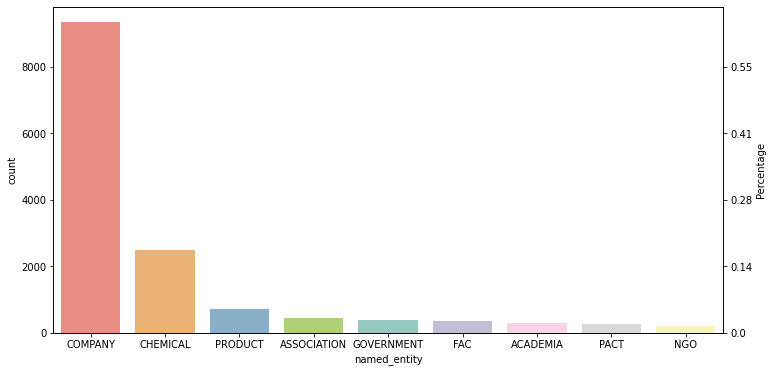

In [ ]:
# countplot of named entity

figs, axs = plt.subplots(1,1, figsize = (12,6))
sns.countplot(x = 'named_entity', data = entity, order = entity['named_entity'].value_counts().index, palette = entity_color_map)
ax1 = axs.twinx()
ax1.set_ylim(axs.get_ylim())
ax1.set_yticklabels(np.round(axs.get_yticks()/entity.shape[0],2))
ax1.set_ylabel('Percentage')
plt.show()


/tmp/ipykernel_13/2740959510.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.round(axs.get_yticks()/len(variable),2))


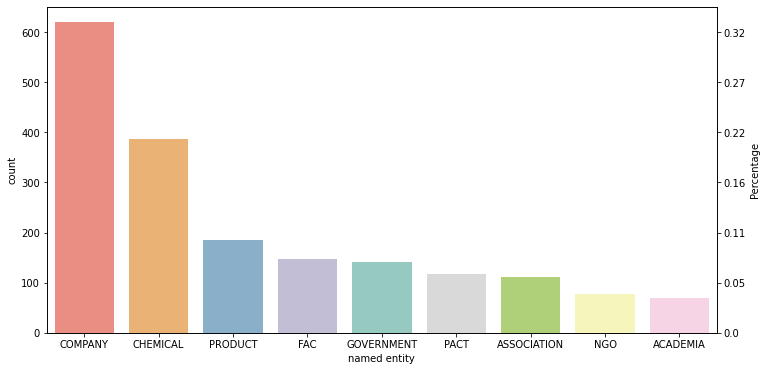

In [ ]:
## countplot of named entity grouped by document
entity_new = entity[['document_id','named_entity']]
d1 = entity_new.groupby(['document_id','named_entity']).count()
variable = []
for i in range(len(d1.index)):
    variable.append(d1.index[i][1])
variable = np.asarray(variable)
d2 = pd.DataFrame(data = {'variable':variable})
figs, axs = plt.subplots(1,1, figsize = (12,6))
sns.countplot(x = 'variable', data = d2, order = d2['variable'].value_counts().index, palette = entity_color_map)
axs.set_xlabel('named entity')
ax1 = axs.twinx()
ax1.set_ylim(axs.get_ylim())
ax1.set_yticklabels(np.round(axs.get_yticks()/len(variable),2))
ax1.set_ylabel('Percentage')
plt.show()

/tmp/ipykernel_13/1034173549.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.round(axs.get_yticks()/cir_entity.shape[0],2))


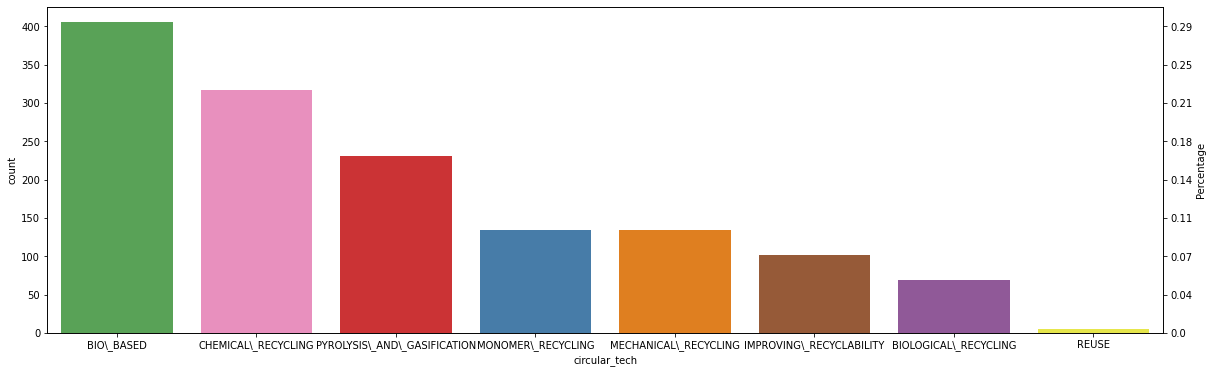

In [ ]:
# countplot of circular technology
cir_entity = entity[entity['circular_tech'] != 'NULL']
figs, axs = plt.subplots(1,1, figsize = (20,6))
sns.countplot(x = 'circular_tech', data = cir_entity, order = cir_entity['circular_tech'].value_counts().index, palette = cir_color_map)
ax1 = axs.twinx()
ax1.set_ylim(axs.get_ylim())
ax1.set_yticklabels(np.round(axs.get_yticks()/cir_entity.shape[0],2))
ax1.set_ylabel('Percentage')
plt.show()

/tmp/ipykernel_13/2275484274.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.round(axs.get_yticks()/len(variable),2))


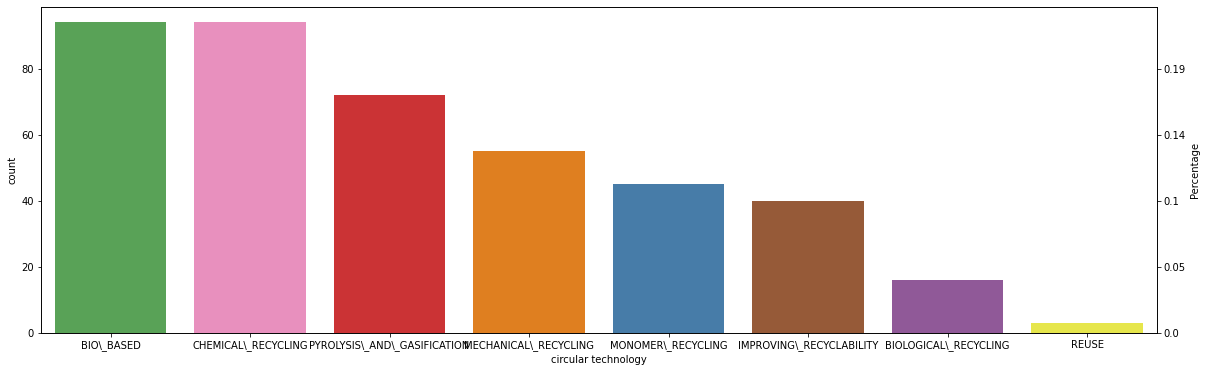

In [ ]:
## countplot of circular technology grouped by document
cir_new = cir_entity[['document_id','circular_tech']]
d1 = cir_new.groupby(['document_id','circular_tech']).count()
variable = []
for i in range(len(d1.index)):
    variable.append(d1.index[i][1])
variable = np.asarray(variable)
d2 = pd.DataFrame(data = {'variable':variable})
figs, axs = plt.subplots(1,1, figsize = (20,6))
sns.countplot(x = 'variable', data = d2, order = d2['variable'].value_counts().index, palette = cir_color_map)
axs.set_xlabel('circular technology')
ax1 = axs.twinx()
ax1.set_ylim(axs.get_ylim())
ax1.set_yticklabels(np.round(axs.get_yticks()/len(variable),2))
ax1.set_ylabel('Percentage')
plt.show()

/tmp/ipykernel_13/4179875216.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.round(axs[i].get_yticks()/entity[entity['named_entity'] == named_entity_label[i]].shape[0],3))
/tmp/ipykernel_13/4179875216.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.round(axs[i].get_yticks()/entity[entity['named_entity'] == named_entity_label[i]].shape[0],3))
/tmp/ipykernel_13/4179875216.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.round(axs[i].get_yticks()/entity[entity['named_entity'] == named_entity_label[i]].shape[0],3))
/tmp/ipykernel_13/4179875216.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.round(axs[i].get_yticks()/entity[entity['named_entity'] == named_entity_label[i]].shape[0],3))
/tmp/ipykernel_13/4179875216.py:8: UserWarning: FixedFormatter should only be us

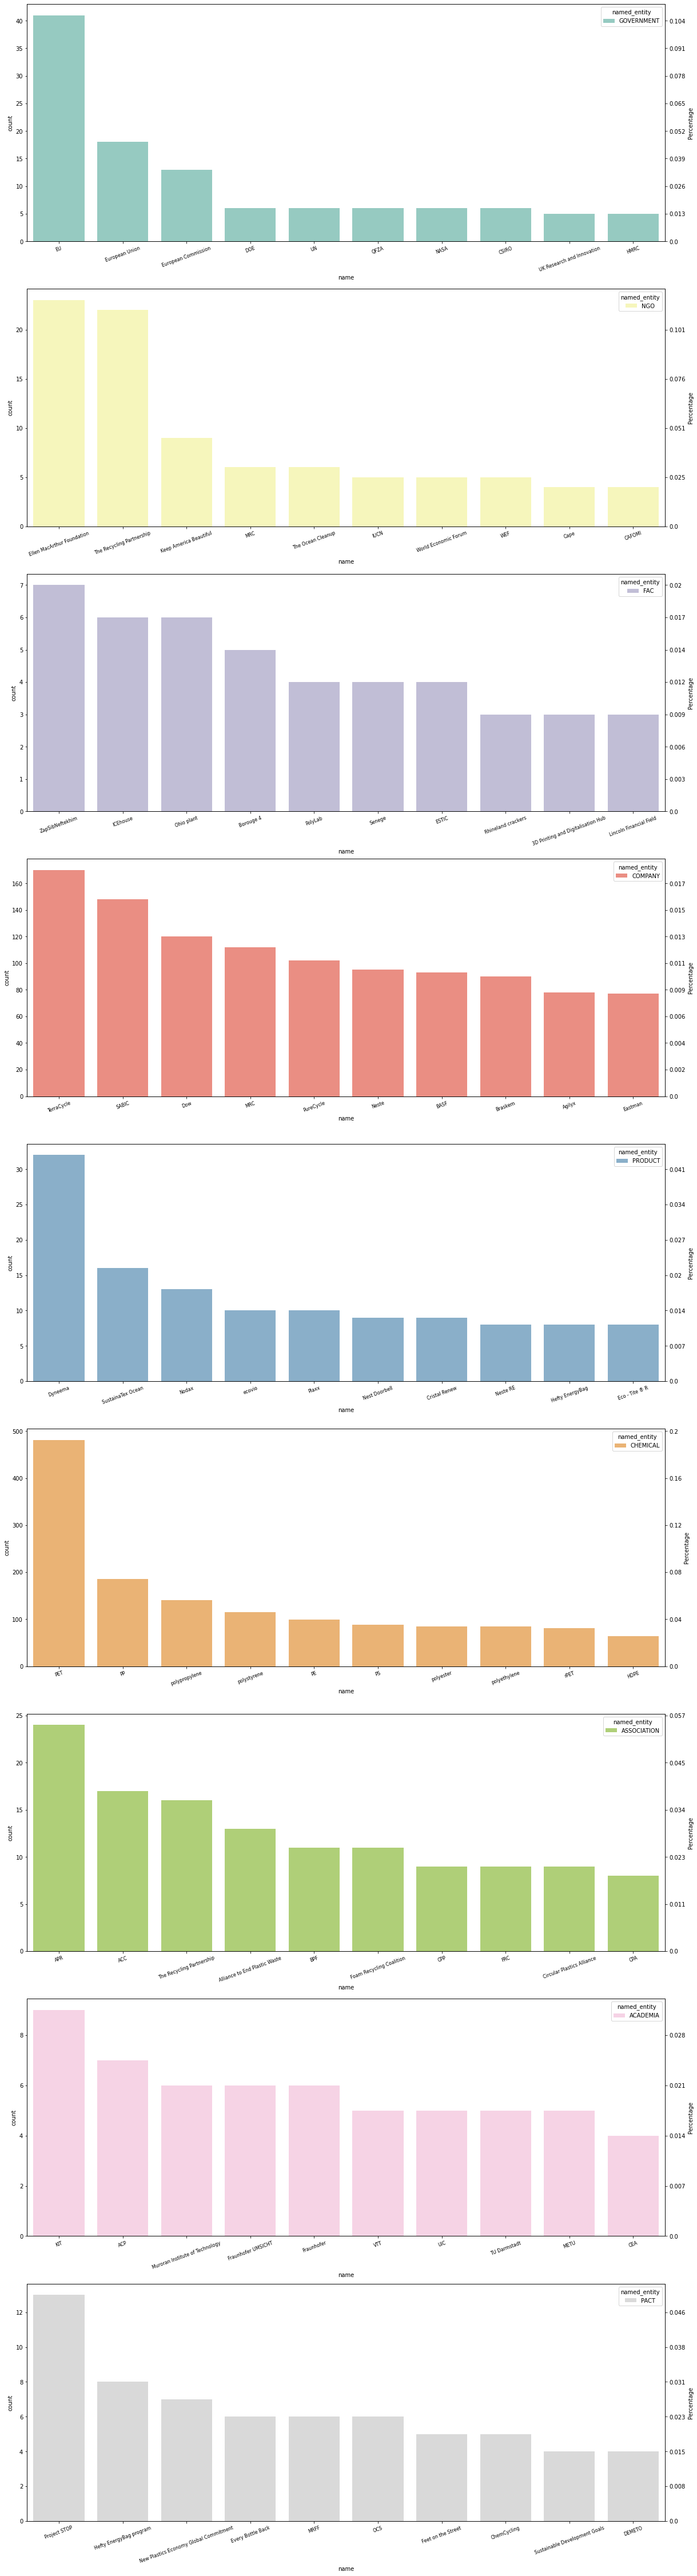

In [ ]:
# countplot of top 10 names for each named entity
figs, axs = plt.subplots(9,1, figsize = (20,81))
for i in range(9):
    sns.countplot(x = 'name', hue = 'named_entity', data = entity[entity['named_entity'] == named_entity_label[i]], order = entity[entity['named_entity'] == named_entity_label[i]]['name'].value_counts().index[:10],  palette = entity_color_map,ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=20, fontsize=8)
    ax1 = axs[i].twinx()
    ax1.set_ylim(axs[i].get_ylim())
    ax1.set_yticklabels(np.round(axs[i].get_yticks()/entity[entity['named_entity'] == named_entity_label[i]].shape[0],3))
    ax1.set_ylabel('Percentage')
plt.show()


/tmp/ipykernel_13/537298244.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.round(axs[i].get_yticks()/cir_entity[cir_entity['circular_tech'] == cir_entity_label[i]].shape[0],3))
/tmp/ipykernel_13/537298244.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.round(axs[i].get_yticks()/cir_entity[cir_entity['circular_tech'] == cir_entity_label[i]].shape[0],3))
/tmp/ipykernel_13/537298244.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.round(axs[i].get_yticks()/cir_entity[cir_entity['circular_tech'] == cir_entity_label[i]].shape[0],3))
/tmp/ipykernel_13/537298244.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.round(axs[i].get_yticks()/cir_entity[cir_entity['circular_tech'] == cir_entity_label[i]].shape[0],3))
/tmp/ipykernel_13/537298244.py:8: UserWarning: FixedForm

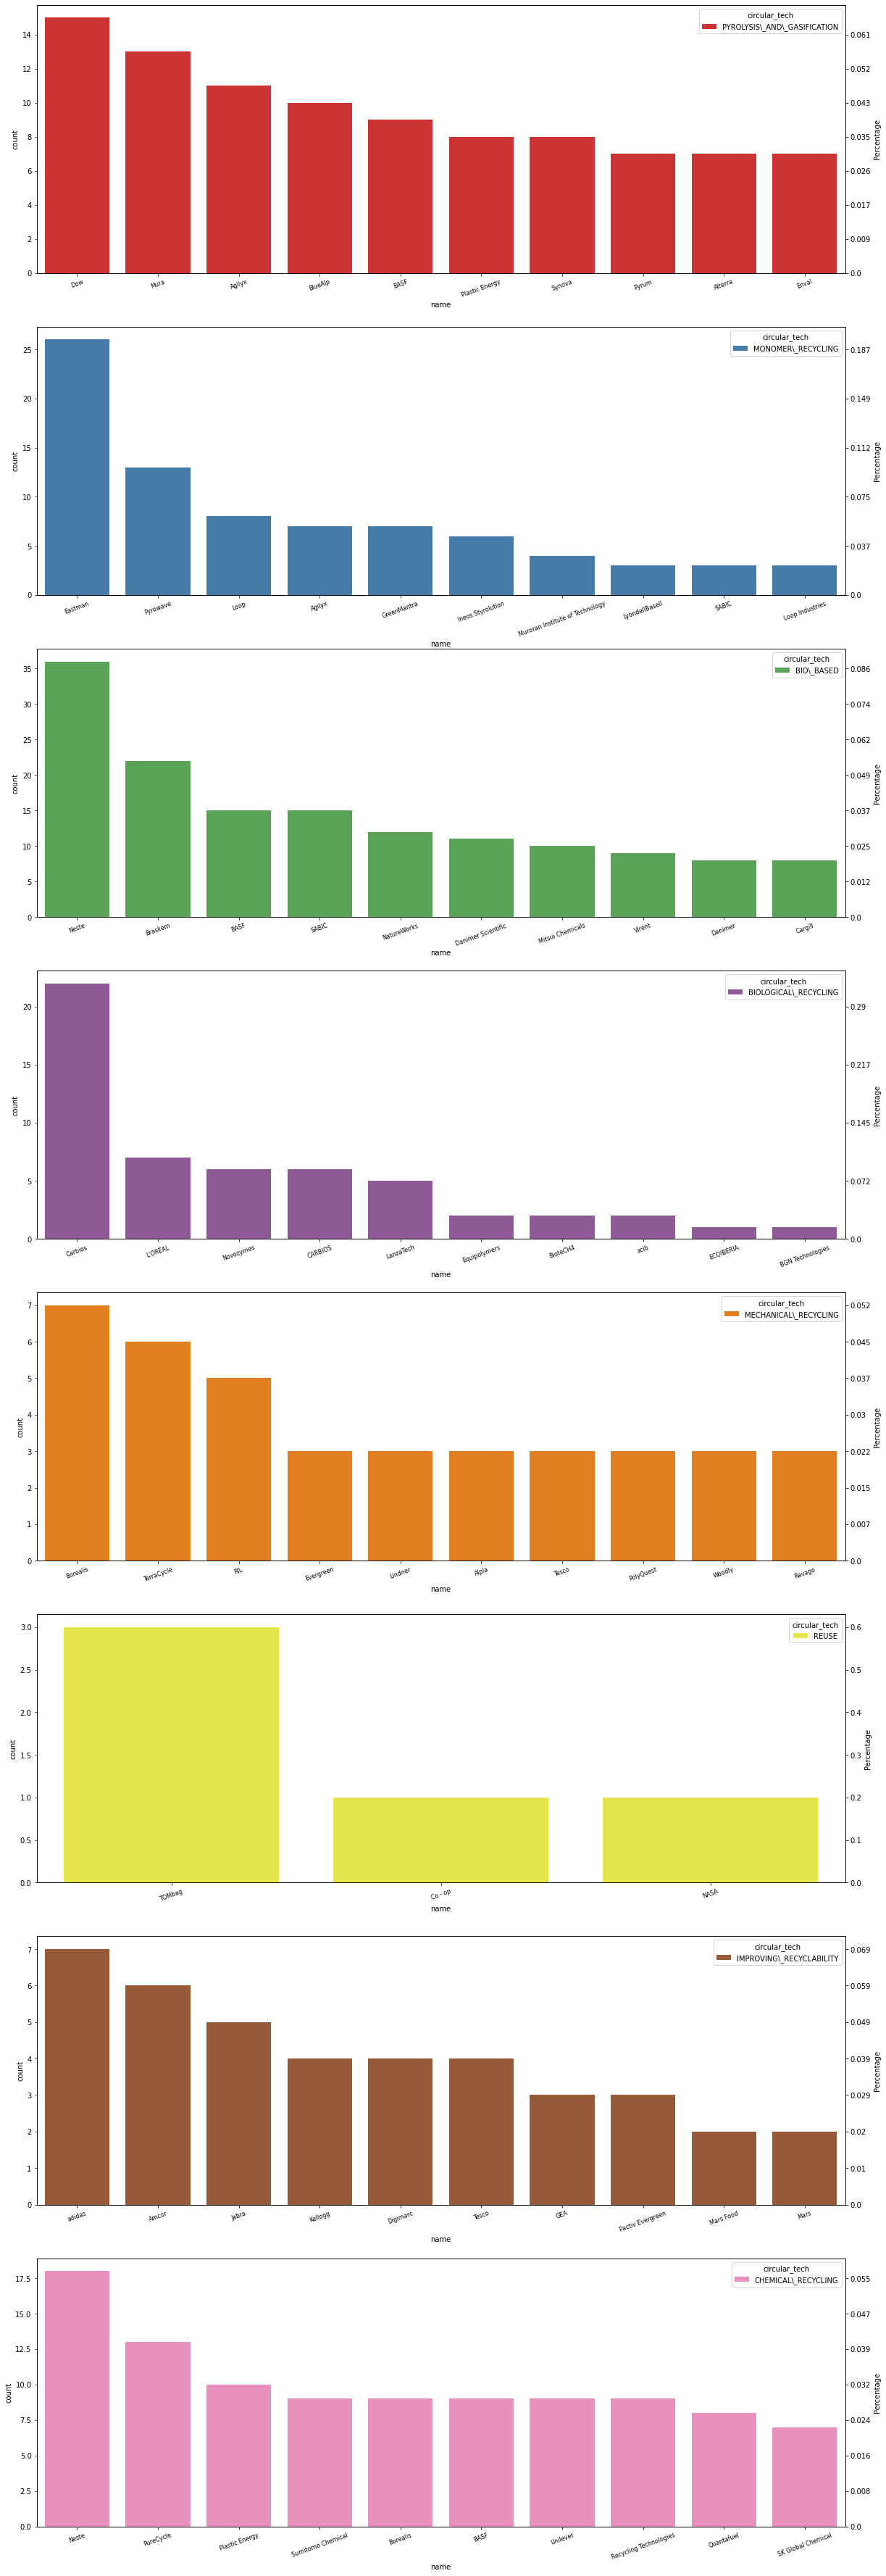

In [ ]:
# countplot of top 10 names for each circular technology
figs, axs = plt.subplots(8,1, figsize = (20,64))
for i in range(8):
    sns.countplot(x = 'name', hue = 'circular_tech', data = cir_entity[cir_entity['circular_tech'] == cir_entity_label[i]], order = cir_entity[cir_entity['circular_tech'] == cir_entity_label[i]]['name'].value_counts().index[:10],  palette = cir_color_map,ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=20, fontsize=8)
    ax1 = axs[i].twinx()
    ax1.set_ylim(axs[i].get_ylim())
    ax1.set_yticklabels(np.round(axs[i].get_yticks()/cir_entity[cir_entity['circular_tech'] == cir_entity_label[i]].shape[0],3))
    ax1.set_ylabel('Percentage')
plt.show()

/tmp/ipykernel_13/1843549963.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.round(axs.get_yticks()/cir_entity.shape[0],2))


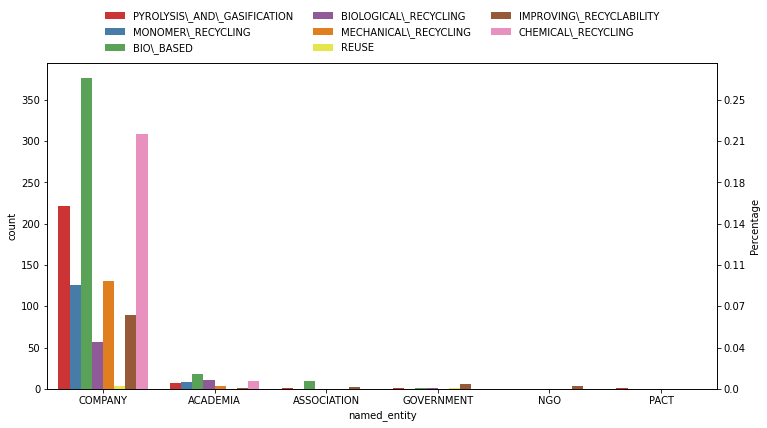

In [ ]:
# countplot of named_entity by circular technology
figs, axs = plt.subplots(1,1, figsize = (12,6))
sns.countplot(x = 'named_entity', hue='circular_tech', data = cir_entity, order = cir_entity['named_entity'].value_counts().index, palette = cir_color_map)
ax1 = axs.twinx()
ax1.set_ylim(axs.get_ylim())
ax1.set_yticklabels(np.round(axs.get_yticks()/cir_entity.shape[0],2))
ax1.set_ylabel('Percentage')
sns.move_legend(axs, "lower center", bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False)
plt.show()

/tmp/ipykernel_13/734402054.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.round(axs.get_yticks()/cir_entity_new.shape[0],2))


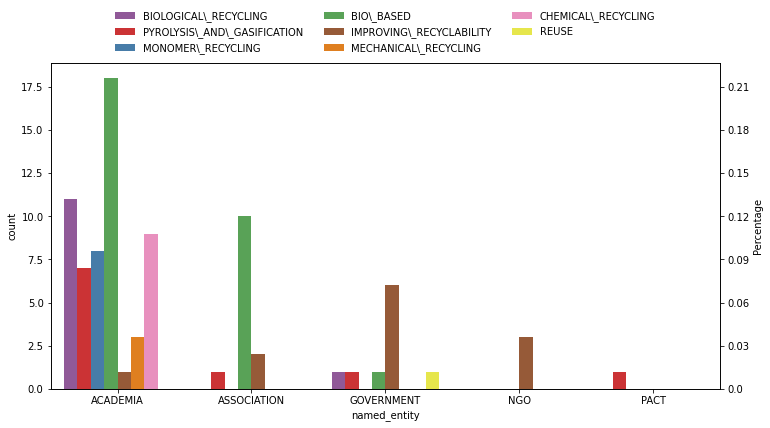

In [ ]:
# countplot of named_entity (except COMPANY) by circular technology
cir_entity_new = cir_entity[cir_entity['named_entity'] != 'COMPANY']
figs, axs = plt.subplots(1,1, figsize = (12,6))
sns.countplot(x = 'named_entity', hue='circular_tech', data = cir_entity_new, order = cir_entity_new['named_entity'].value_counts().index, palette = cir_color_map)
ax1 = axs.twinx()
ax1.set_ylim(axs.get_ylim())
ax1.set_yticklabels(np.round(axs.get_yticks()/cir_entity_new.shape[0],2))
ax1.set_ylabel('Percentage')
sns.move_legend(axs, "lower center", bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False)
plt.show()

### 2.2 Partnership

#### 2.2.1 Write into csv file

In [ ]:
data = pd.read_json('ner_curation_data.json')
data['PARTNERSHIP_RELATIONS'].fillna('', inplace=True)
subject_name = []
subject_named_entity = []
object_name = []
object_named_entity = []
partnership = []
document_id = []
sentence_id = []
for i, sentence in enumerate(data['PARTNERSHIP_RELATIONS']):
    for _, part in enumerate(sentence):
        document_id.append(int(data['document_id'][i][:6]))
        sentence_id.append(int(data['sentence_id'][i]))
        partnership.append(part['label'])
        subject_name.append(part['subject']['name'])
        object_name.append(part['object']['name'])
        subject_named_entity.append(data['NER_BIO_FORMAT'][i][part['subject']['tokens'][0]-1][1][2:])
        object_named_entity.append(data['NER_BIO_FORMAT'][i][part['object']['tokens'][0]-1][1][2:])

In [ ]:
subject_name = np.asarray(subject_name)
subject_named_entity = np.asarray(subject_named_entity)
object_name = np.asarray(object_name)
object_named_entity = np.asarray(object_named_entity)
partnership = np.asarray(partnership)
document_id = np.asarray(document_id)
sentence_id = np.asarray(sentence_id)

In [ ]:
PARTNERSHIP = pd.DataFrame(data={'document_id':document_id, 'sentence_id':sentence_id, 'subject_name':subject_name, 'subject_named_entity':subject_named_entity, 'object_name':object_name, 'object_named_entity':object_named_entity, 'partnership':partnership})
PARTNERSHIP.head()
#PARTNERSHIP.to_csv('PARTNERSHIP.csv')

,document_id,sentence_id,subject_name,subject_named_entity,object_name,object_named_entity,partnership
0,1,2,Merkinch Local Nature Reserve ( MLNR ) Boardwalk,FAC,Highland Council,GOVERNMENT,LAUNCHED\_BY
1,1,2,Highland Council,GOVERNMENT,Sustrans,NGO,OTHER
2,1,2,Merkinch Local Nature Reserve ( MLNR ) Boardwalk,FAC,Sustrans,NGO,LAUNCHED\_BY
3,2,2,polyester,CHEMICAL,Moss,COMPANY,INVOLVED\_IN
4,2,2,Moss,COMPANY,SEAQUAL INITIATIVE,ASSOCIATION,PLEDGE


#### 2.2.2 Visualization

In [ ]:
#define palette
part_label = PARTNERSHIP['partnership'].unique()
part_rgb_values = sns.color_palette("husl", 15)
part_color_map = dict(zip(part_label, part_rgb_values))

/tmp/ipykernel_13/3423256442.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.round(axs.get_yticks()/PARTNERSHIP.shape[0],2))


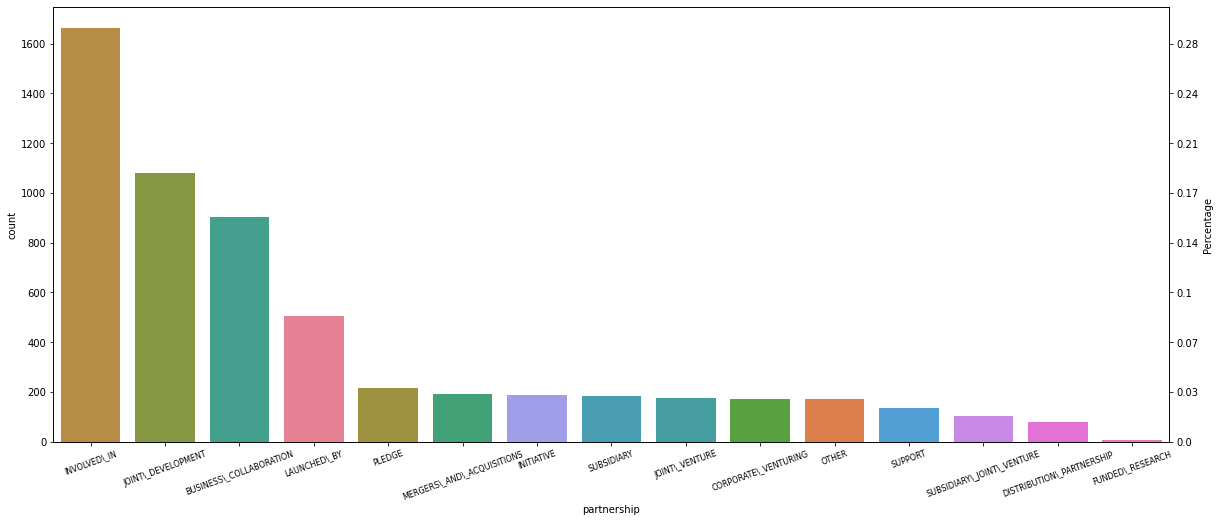

In [ ]:
# countplot of partnership
figs, axs = plt.subplots(1,1, figsize = (20,8))
sns.countplot(x = 'partnership', data = PARTNERSHIP, order = PARTNERSHIP['partnership'].value_counts().index, palette = part_color_map)
ax1 = axs.twinx()
ax1.set_ylim(axs.get_ylim())
ax1.set_yticklabels(np.round(axs.get_yticks()/PARTNERSHIP.shape[0],2))
ax1.set_ylabel('Percentage')
axs.set_xticklabels(axs.get_xticklabels(), rotation=20, fontsize=8)
plt.show()

/tmp/ipykernel_13/790255083.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.round(axs.get_yticks()/len(variable),2))


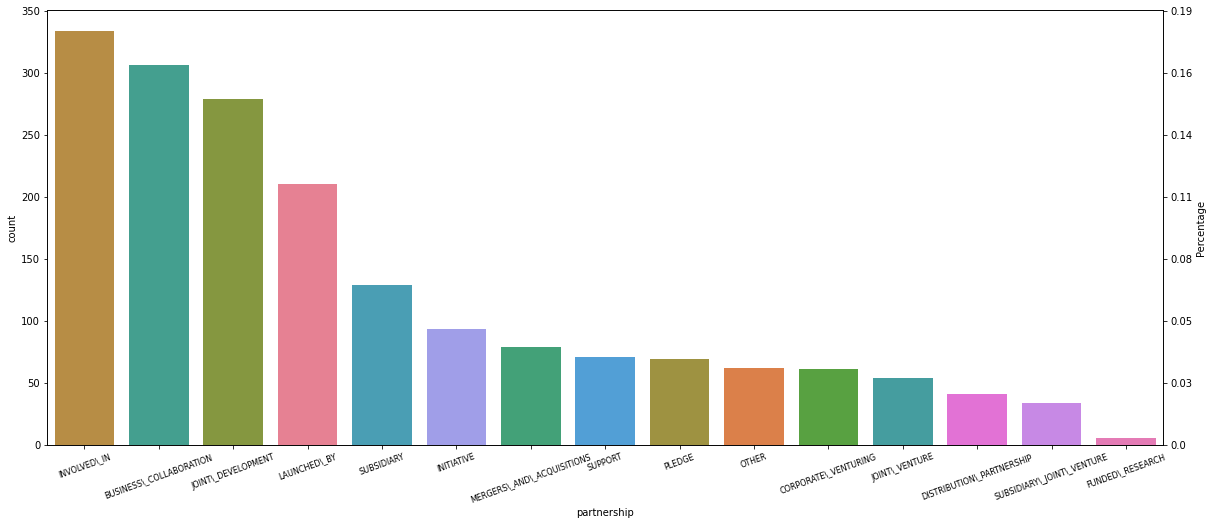

In [ ]:
# countplot of partnership by document
par_new = PARTNERSHIP[['document_id','partnership']]
d1 = par_new.groupby(['document_id','partnership']).count()
variable = []
for i in range(len(d1.index)):
    variable.append(d1.index[i][1])
variable = np.asarray(variable)
d2 = pd.DataFrame(data = {'variable':variable})
figs, axs = plt.subplots(1,1, figsize = (20,8))
sns.countplot(x = 'variable', data = d2, order = d2['variable'].value_counts().index, palette = part_color_map)
axs.set_xlabel('partnership')
ax1 = axs.twinx()
ax1.set_ylim(axs.get_ylim())
ax1.set_yticklabels(np.round(axs.get_yticks()/len(variable),2))
ax1.set_ylabel('Percentage')
axs.set_xticklabels(axs.get_xticklabels(), rotation=20, fontsize=8)
plt.show()


/tmp/ipykernel_13/863316391.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.round(axs.get_yticks()/PARTNERSHIP.shape[0],2))


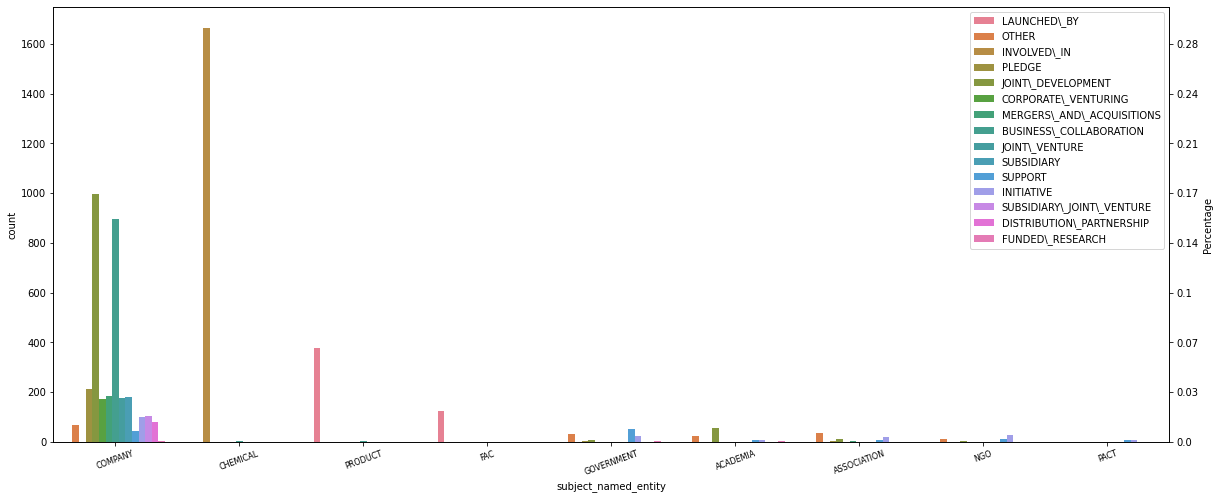

In [ ]:
#countplot of subject named entity by partnership
figs, axs = plt.subplots(1,1, figsize = (20,8))
sns.countplot(x = 'subject_named_entity',hue = 'partnership', data = PARTNERSHIP, order = PARTNERSHIP['subject_named_entity'].value_counts().index, palette = part_color_map)
ax1 = axs.twinx()
ax1.set_ylim(axs.get_ylim())
ax1.set_yticklabels(np.round(axs.get_yticks()/PARTNERSHIP.shape[0],2))
ax1.set_ylabel('Percentage')
axs.set_xticklabels(axs.get_xticklabels(), rotation=20, fontsize=8)
axs.legend(loc='upper right')
plt.show()

/tmp/ipykernel_13/670294407.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.round(axs.get_yticks()/PARTNERSHIP.shape[0],2))


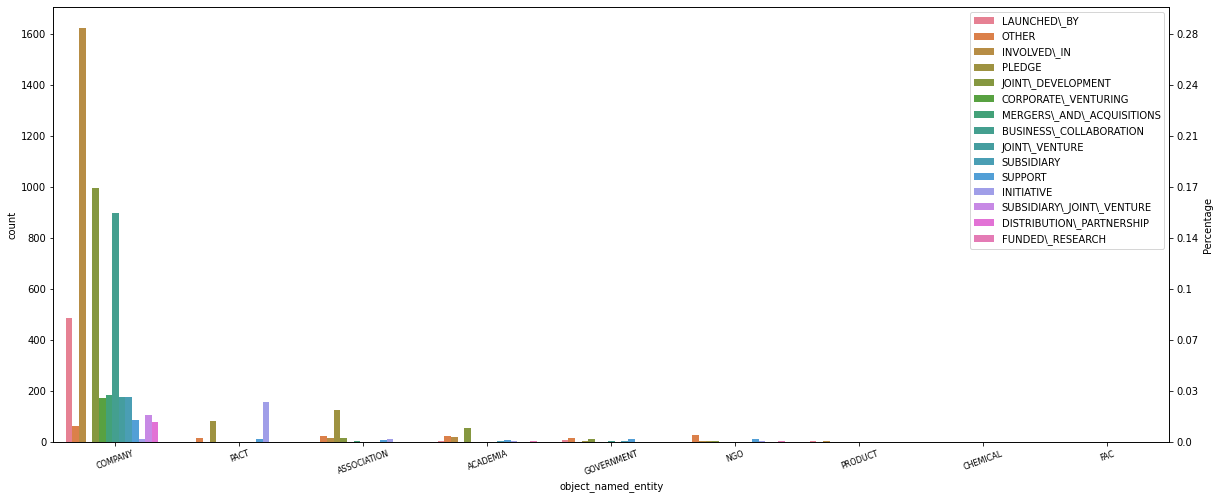

In [ ]:
#countplot of object named entity by partnership
figs, axs = plt.subplots(1,1, figsize = (20,8))
sns.countplot(x = 'object_named_entity',hue = 'partnership', data = PARTNERSHIP, order = PARTNERSHIP['object_named_entity'].value_counts().index, palette = part_color_map)
ax1 = axs.twinx()
ax1.set_ylim(axs.get_ylim())
ax1.set_yticklabels(np.round(axs.get_yticks()/PARTNERSHIP.shape[0],2))
ax1.set_ylabel('Percentage')
axs.set_xticklabels(axs.get_xticklabels(), rotation=20, fontsize=8)
axs.legend(loc='upper right')
plt.show()